# 2023-05-17


## [3] 데이터셋 분리 및 모델 설계


1. 데이터 불러오기
2. 데이터셋 분리(x, y)
3. train, test 분리
4. 모델 설계 및 학습

In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
import sklearn

## 1. 데이터셋 불러오기

In [14]:
# df_sample = pd.read_csv('./data/total/3_1_csv/squat_skeleton000.csv')
# df_sample

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,21
0,0,0.48919,0.16059,0.61322,0.25890,0.35582,0.26689,0.57819,0.50933,0.40289,...,0.35083,0.71906,0.66521,0.89063,0.31750,0.89752,0.77351,0.95428,0.22593,0.96713
1,1,0.49163,0.16628,0.61065,0.26227,0.35769,0.26975,0.57721,0.50601,0.40038,...,0.35245,0.71909,0.66995,0.89037,0.31936,0.89529,0.77325,0.95728,0.22997,0.96488
2,2,0.49316,0.16503,0.61507,0.26085,0.35974,0.26356,0.57302,0.50594,0.40222,...,0.35336,0.71335,0.66339,0.88898,0.32171,0.88589,0.77177,0.95322,0.23218,0.95883
3,3,0.48892,0.16060,0.61782,0.25734,0.36460,0.26332,0.57428,0.50715,0.39885,...,0.35030,0.71245,0.66759,0.88732,0.32016,0.89072,0.77949,0.95316,0.22272,0.96346
4,4,0.49480,0.17635,0.61342,0.26889,0.36214,0.27765,0.57676,0.51873,0.40431,...,0.32796,0.69363,0.67339,0.88687,0.32720,0.89166,0.79428,0.95257,0.22187,0.96048
5,5,0.48943,0.25601,0.63725,0.35166,0.34624,0.35736,0.57755,0.58792,0.39657,...,0.24506,0.72636,0.68440,0.90020,0.30141,0.90502,0.80142,0.95183,0.20816,0.96640
6,6,0.48558,0.37706,0.63720,0.46092,0.33456,0.46502,0.58080,0.66779,0.39735,...,0.19607,0.75728,0.68085,0.89946,0.31003,0.90448,0.79605,0.95214,0.21249,0.96406
7,7,0.48649,0.45039,0.64286,0.53784,0.34203,0.54252,0.58648,0.72742,0.42370,...,0.19989,0.75606,0.68974,0.89698,0.31469,0.89966,0.79344,0.95027,0.21757,0.96391
8,8,0.49162,0.46921,0.64189,0.55912,0.33913,0.55958,0.58638,0.74649,0.42208,...,0.20591,0.76167,0.69248,0.89828,0.31348,0.90253,0.79119,0.94583,0.22030,0.96077
9,9,0.49563,0.46400,0.64345,0.55170,0.34134,0.55344,0.59011,0.74098,0.42526,...,0.20621,0.75758,0.68184,0.89899,0.31763,0.90358,0.78827,0.95057,0.22013,0.96460


In [15]:
# df_sample.set_index('Unnamed: 0', inplace=True)
# df_sample

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0.48919,0.16059,0.61322,0.25890,0.35582,0.26689,0.57819,0.50933,0.40289,0.51002,...,0.35083,0.71906,0.66521,0.89063,0.31750,0.89752,0.77351,0.95428,0.22593,0.96713
1,0.49163,0.16628,0.61065,0.26227,0.35769,0.26975,0.57721,0.50601,0.40038,0.50728,...,0.35245,0.71909,0.66995,0.89037,0.31936,0.89529,0.77325,0.95728,0.22997,0.96488
2,0.49316,0.16503,0.61507,0.26085,0.35974,0.26356,0.57302,0.50594,0.40222,0.50679,...,0.35336,0.71335,0.66339,0.88898,0.32171,0.88589,0.77177,0.95322,0.23218,0.95883
3,0.48892,0.16060,0.61782,0.25734,0.36460,0.26332,0.57428,0.50715,0.39885,0.50679,...,0.35030,0.71245,0.66759,0.88732,0.32016,0.89072,0.77949,0.95316,0.22272,0.96346
4,0.49480,0.17635,0.61342,0.26889,0.36214,0.27765,0.57676,0.51873,0.40431,0.52089,...,0.32796,0.69363,0.67339,0.88687,0.32720,0.89166,0.79428,0.95257,0.22187,0.96048
5,0.48943,0.25601,0.63725,0.35166,0.34624,0.35736,0.57755,0.58792,0.39657,0.59001,...,0.24506,0.72636,0.68440,0.90020,0.30141,0.90502,0.80142,0.95183,0.20816,0.96640
6,0.48558,0.37706,0.63720,0.46092,0.33456,0.46502,0.58080,0.66779,0.39735,0.67057,...,0.19607,0.75728,0.68085,0.89946,0.31003,0.90448,0.79605,0.95214,0.21249,0.96406
7,0.48649,0.45039,0.64286,0.53784,0.34203,0.54252,0.58648,0.72742,0.42370,0.72943,...,0.19989,0.75606,0.68974,0.89698,0.31469,0.89966,0.79344,0.95027,0.21757,0.96391
8,0.49162,0.46921,0.64189,0.55912,0.33913,0.55958,0.58638,0.74649,0.42208,0.74985,...,0.20591,0.76167,0.69248,0.89828,0.31348,0.90253,0.79119,0.94583,0.22030,0.96077


In [16]:
# df_sample.shape[0]

15

In [6]:
# # (연습)모델에 학습 가능한 형태인 1차원 넘파이 배열 형태로 변경하기

# sample = df1.iloc[0:3]
# print(f'sample shape = {sample.shape}')

# # 1. 넘파이 배열로 바꾸기
# sample_list = np.array(sample)
# print(f'sample_list shape = {sample_list.shape}')

# # 2. flatten
# sample_list2 = sample_list.flatten()
# print(f'sample_list2 shape = {sample_list2.shape}')

# # 3. reshape
# sample_list3 = sample_list2.reshape(sample_list.shape)
# print(f'sample_list3 shape = {sample_list3.shape}')
# sample_list3

sample shape = (3, 22)
sample_list shape = (3, 22)
sample_list2 shape = (66,)
sample_list3 shape = (3, 22)


array([[0.48919, 0.16059, 0.61322, 0.2589 , 0.35582, 0.26689, 0.57819,
        0.50933, 0.40289, 0.51002, 0.63191, 0.71523, 0.35083, 0.71906,
        0.66521, 0.89063, 0.3175 , 0.89752, 0.77351, 0.95428, 0.22593,
        0.96713],
       [0.49163, 0.16628, 0.61065, 0.26227, 0.35769, 0.26975, 0.57721,
        0.50601, 0.40038, 0.50728, 0.6339 , 0.71535, 0.35245, 0.71909,
        0.66995, 0.89037, 0.31936, 0.89529, 0.77325, 0.95728, 0.22997,
        0.96488],
       [0.49316, 0.16503, 0.61507, 0.26085, 0.35974, 0.26356, 0.57302,
        0.50594, 0.40222, 0.50679, 0.62634, 0.71251, 0.35336, 0.71335,
        0.66339, 0.88898, 0.32171, 0.88589, 0.77177, 0.95322, 0.23218,
        0.95883]])

In [11]:
# sample_list

array([[0.48919, 0.16059, 0.61322, 0.2589 , 0.35582, 0.26689, 0.57819,
        0.50933, 0.40289, 0.51002, 0.63191, 0.71523, 0.35083, 0.71906,
        0.66521, 0.89063, 0.3175 , 0.89752, 0.77351, 0.95428, 0.22593,
        0.96713],
       [0.49163, 0.16628, 0.61065, 0.26227, 0.35769, 0.26975, 0.57721,
        0.50601, 0.40038, 0.50728, 0.6339 , 0.71535, 0.35245, 0.71909,
        0.66995, 0.89037, 0.31936, 0.89529, 0.77325, 0.95728, 0.22997,
        0.96488],
       [0.49316, 0.16503, 0.61507, 0.26085, 0.35974, 0.26356, 0.57302,
        0.50594, 0.40222, 0.50679, 0.62634, 0.71251, 0.35336, 0.71335,
        0.66339, 0.88898, 0.32171, 0.88589, 0.77177, 0.95322, 0.23218,
        0.95883]])

In [18]:
# # 1. 경로에서 csv 파일만 불러온다.

# csv_path = './data/total/3_1_csv/'
# csv_name = []

# for i in sorted(os.listdir(csv_path)):
#     if i[-3:] == 'csv':
#         csv_name.append(i)
        
# print(f'csv count : {len(csv_name)}')
# # csv_name

# # 2. csv파일을 데이터프레임으로 불러온다. (df000, df001, ... , df072)

# for i in range(len(csv_name)):
#     if i < 10:
#         globals()[f'df00{i}'] = pd.read_csv(csv_path + csv_name[i])
#         globals()[f'df00{i}'].set_index('Unnamed: 0', inplace=True)
#     elif i < 100:
#         globals()[f'df0{i}'] = pd.read_csv(csv_path + csv_name[i])
#         globals()[f'df0{i}'].set_index('Unnamed: 0', inplace=True)
#     else:
#         globals()[f'df{i}'] = pd.read_csv(csv_path + csv_name[i])
#         globals()[f'df{i}'].set_index('Unnamed: 0', inplace=True)
        

csv count : 73


In [3]:
# 1. 경로에서 csv 파일만 불러온다.

csv_path = './data/total_0513/3_csv/'
csv_name = []

for i in sorted(os.listdir(csv_path)):
    if i[-3:] == 'csv':
        csv_name.append(i)
        
print(f'csv count : {len(csv_name)}')
csv_name

# 2. csv파일을 데이터프레임으로 불러온다. (df000, df001, ... , df072)

for i in csv_name:
    globals()[f'df{i[14:-4]}'] = pd.read_csv(csv_path + i)
    globals()[f'df{i[14:-4]}'].set_index('Unnamed: 0', inplace=True)


csv count : 132


In [9]:
# csv 넘버링

# csv_path = './data/total/3_csv/0508_skeleton/'
# new_path = './data/total/3_csv/0508_skeleton/'
# csv_name = []

# for i in sorted(os.listdir(csv_path)):
#     if i[-3:] == 'csv':
#         csv_name.append(i)
        
# print(f'csv count : {len(csv_name)}')
# # csv_name

# for i in range(len(csv_name)):
#     old_name = csv_path + csv_name[i]
#     if i+33 < 10:
#         new_name = new_path + f'squat_skeleton00{i+33}.csv'
#     elif i+33< 100:
#         new_name = new_path + f'squat_skeleton0{i+33}.csv'
#     else:
#         new_name = new_path + f'squat_skeleton{i+33}.csv'
        
#     os.rename(old_name, new_name)

csv count : 40


In [8]:
# csv_path = './data/csv/skeleton_squat/'

# for no, i in enumerate(csv_name):
#     file_path = csv_path + i
#     num = csv_name[no][-6:-4]
#     globals()[f'df{num}'] = pd.read_csv(file_path)
#     globals()[f'df{num}'].set_index('Unnamed: 0', inplace=True)

In [10]:
# csv_name[30][-6:-4]

'64'

In [4]:
df122

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0.51583,0.11907,0.68748,0.23637,0.33666,0.24176,0.60848,0.48697,0.40917,0.48403,...,0.37256,0.68699,0.70853,0.87821,0.29716,0.88047,0.72353,0.94088,0.27281,0.94397
1,0.51813,0.11482,0.68398,0.23671,0.33552,0.23777,0.60471,0.48573,0.41201,0.48166,...,0.38177,0.68266,0.70901,0.88074,0.28883,0.88036,0.72997,0.94223,0.28571,0.95164
2,0.51165,0.12208,0.68335,0.23945,0.33111,0.24028,0.60217,0.48921,0.40294,0.48783,...,0.37225,0.69296,0.70888,0.87419,0.30304,0.88003,0.73053,0.93542,0.28601,0.94469
3,0.52528,0.11406,0.67548,0.22860,0.34068,0.23245,0.60333,0.48336,0.40965,0.48269,...,0.37285,0.68641,0.70808,0.88276,0.29180,0.88387,0.75926,0.94450,0.26926,0.94882
4,0.53029,0.14581,0.67569,0.24533,0.33414,0.24588,0.59369,0.49907,0.40388,0.50078,...,0.32782,0.70517,0.71812,0.88925,0.29532,0.88578,0.75551,0.94951,0.26391,0.94976
5,0.52335,0.23947,0.66219,0.33798,0.34490,0.33741,0.59432,0.55452,0.40444,0.55768,...,0.28156,0.72799,0.71227,0.88215,0.28576,0.88899,0.77153,0.94809,0.25951,0.94655
6,0.52840,0.34762,0.67530,0.45440,0.33767,0.44862,0.59413,0.61443,0.40732,0.61052,...,0.25135,0.73932,0.70603,0.88741,0.27963,0.88882,0.76723,0.94637,0.24282,0.94212
7,0.52537,0.44568,0.68166,0.54700,0.33371,0.53742,0.59803,0.68427,0.41442,0.68248,...,0.25473,0.74532,0.70883,0.88487,0.28215,0.89130,0.76564,0.94676,0.24617,0.94512
8,0.52497,0.48336,0.67357,0.57363,0.33103,0.57045,0.59559,0.70224,0.41315,0.69965,...,0.25288,0.74794,0.70724,0.88438,0.28492,0.88863,0.74970,0.94350,0.24875,0.94684


In [30]:
# import os

# path = './data/total/temp/'

# lst = sorted(os.listdir(path))
# lst2 = []

# for i in lst:
#     if i == '.DS_Store':
#         pass
#     else:
#         lst2.append(i)
        
# # lst2

# for i in range(len(lst2)):
#     old_name = path + lst2[i]
#     if i+34 < 10:
#         new_name = f'./data/total/2_2_image/00{i+34}'
#     elif i+34 < 100:
#         new_name = f'./data/total/2_2_image/0{i+34}'
#     else:
#         new_name = f'./data/total/2_2_image/{i+34}'
#     print(new_name)
        
#     os.rename(old_name, new_name)

./data/total/2_2_image/034
./data/total/2_2_image/035
./data/total/2_2_image/036
./data/total/2_2_image/037
./data/total/2_2_image/038
./data/total/2_2_image/039
./data/total/2_2_image/040
./data/total/2_2_image/041
./data/total/2_2_image/042
./data/total/2_2_image/043
./data/total/2_2_image/044
./data/total/2_2_image/045
./data/total/2_2_image/046
./data/total/2_2_image/047
./data/total/2_2_image/048
./data/total/2_2_image/049
./data/total/2_2_image/050
./data/total/2_2_image/051
./data/total/2_2_image/052
./data/total/2_2_image/053
./data/total/2_2_image/054
./data/total/2_2_image/055
./data/total/2_2_image/056
./data/total/2_2_image/057
./data/total/2_2_image/058
./data/total/2_2_image/059
./data/total/2_2_image/060
./data/total/2_2_image/061
./data/total/2_2_image/062
./data/total/2_2_image/063
./data/total/2_2_image/064
./data/total/2_2_image/065
./data/total/2_2_image/066
./data/total/2_2_image/067
./data/total/2_2_image/068
./data/total/2_2_image/069
./data/total/2_2_image/070
.

<br>

## 2. train, test data split

<br>

1. 데이터프레임을 넘파이 배열로 변환한다
2. flatten()을 하여 1차원 배열로 바꾼다

In [9]:
# # (연습)

# X0 = df00.iloc[0]
# y0 = df00.iloc[1:]

# print(f'X0 shape = {X0.shape}, y0 shape = {y0.shape}')

In [15]:
# # (연습)

# X0_arr = np.array(X0)
# print(X0_arr.shape)
# X0_arr

(22,)


array([0.48919, 0.16059, 0.61322, 0.2589 , 0.35582, 0.26689, 0.57819,
       0.50933, 0.40289, 0.51002, 0.63191, 0.71523, 0.35083, 0.71906,
       0.66521, 0.89063, 0.3175 , 0.89752, 0.77351, 0.95428, 0.22593,
       0.96713])

In [16]:
# # (연습)

# X29 = df29.iloc[0]
# print(f'X29 shape = {X29.shape}')

# X29_arr = np.array(X29)
# print(X29_arr.shape)
# X29_arr

X29 shape = (22,)
(22,)


array([0.39451, 0.28699, 0.51257, 0.36082, 0.27555, 0.35744, 0.46209,
       0.53346, 0.3304 , 0.5306 , 0.50841, 0.68323, 0.30886, 0.68184,
       0.55955, 0.8223 , 0.24603, 0.81298, 0.59532, 0.85957, 0.22992,
       0.85717])

In [17]:
# # (연습)

# X_tot = np.array([X0_arr, X29_arr])
# print(f'X_tot shape = {X_tot.shape}')
# X_tot

X_tot shape = (2, 22)


array([[0.48919, 0.16059, 0.61322, 0.2589 , 0.35582, 0.26689, 0.57819,
        0.50933, 0.40289, 0.51002, 0.63191, 0.71523, 0.35083, 0.71906,
        0.66521, 0.89063, 0.3175 , 0.89752, 0.77351, 0.95428, 0.22593,
        0.96713],
       [0.39451, 0.28699, 0.51257, 0.36082, 0.27555, 0.35744, 0.46209,
        0.53346, 0.3304 , 0.5306 , 0.50841, 0.68323, 0.30886, 0.68184,
        0.55955, 0.8223 , 0.24603, 0.81298, 0.59532, 0.85957, 0.22992,
        0.85717]])

In [5]:
df000

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0.48919,0.16059,0.61322,0.25890,0.35582,0.26689,0.57819,0.50933,0.40289,0.51002,...,0.35083,0.71906,0.66521,0.89063,0.31750,0.89752,0.77351,0.95428,0.22593,0.96713
1,0.49163,0.16628,0.61065,0.26227,0.35769,0.26975,0.57721,0.50601,0.40038,0.50728,...,0.35245,0.71909,0.66995,0.89037,0.31936,0.89529,0.77325,0.95728,0.22997,0.96488
2,0.49316,0.16503,0.61507,0.26085,0.35974,0.26356,0.57302,0.50594,0.40222,0.50679,...,0.35336,0.71335,0.66339,0.88898,0.32171,0.88589,0.77177,0.95322,0.23218,0.95883
3,0.48892,0.16060,0.61782,0.25734,0.36460,0.26332,0.57428,0.50715,0.39885,0.50679,...,0.35030,0.71245,0.66759,0.88732,0.32016,0.89072,0.77949,0.95316,0.22272,0.96346
4,0.49480,0.17635,0.61342,0.26889,0.36214,0.27765,0.57676,0.51873,0.40431,0.52089,...,0.32796,0.69363,0.67339,0.88687,0.32720,0.89166,0.79428,0.95257,0.22187,0.96048
5,0.48943,0.25601,0.63725,0.35166,0.34624,0.35736,0.57755,0.58792,0.39657,0.59001,...,0.24506,0.72636,0.68440,0.90020,0.30141,0.90502,0.80142,0.95183,0.20816,0.96640
6,0.48558,0.37706,0.63720,0.46092,0.33456,0.46502,0.58080,0.66779,0.39735,0.67057,...,0.19607,0.75728,0.68085,0.89946,0.31003,0.90448,0.79605,0.95214,0.21249,0.96406
7,0.48649,0.45039,0.64286,0.53784,0.34203,0.54252,0.58648,0.72742,0.42370,0.72943,...,0.19989,0.75606,0.68974,0.89698,0.31469,0.89966,0.79344,0.95027,0.21757,0.96391
8,0.49162,0.46921,0.64189,0.55912,0.33913,0.55958,0.58638,0.74649,0.42208,0.74985,...,0.20591,0.76167,0.69248,0.89828,0.31348,0.90253,0.79119,0.94583,0.22030,0.96077


In [6]:
df000.iloc[[0]].shape

(1, 22)

In [ ]:
df122

In [50]:
# 1. 데이터프레임을 불러온다.
# 2. df를 tempX, tempY로 분리한다
# 3. tempX, tempY를 1차원 넘파이 배열로 만든다.
# 4. 넘파이 배열들을 X, y에 모아서 인/아웃풋 데이터셋을 완성한다.

# df000 ~ df112.iloc[0] -> X_train
# df000 ~ df112.iloc[1:] -> y_train

arrX = []
arrY = []

for no, i in enumerate(range(132)):
    if i < 10:
        i = f'00{i}'
    elif i < 100:
        i = f'0{i}'
    else:
        i = f'{i}'
        
#     print(no, i)
    tempX = globals()[f'df{i}'].iloc[0]
    tempY = globals()[f'df{i}'].iloc[1:]
#     print(tempX.shape, tempY.shape)

    tempX = np.array(tempX)
    tempY = np.array(tempY)
#     print(tempX.shape, tempY.shape)

    tempY = tempY.flatten() # 일차원 넘파이 배열로 변경
#     tempY = list(tempY)
#     print(tempX.shape, tempY.shape)

    arrX.append(tempX)
    arrY.append(tempY)
    
#     print()
    
X_train = np.array(arrX)
y_train = np.array(arrY)
 
print(f'X_train.shape = {X_train.shape}, y_train.shape = {y_train.shape}')

X_train.shape = (132, 22), y_train.shape = (132, 308)


In [7]:
# 1. 데이터프레임을 불러온다.
# 2. df를 tempX, tempY로 분리한다
# 3. tempX, tempY를 1차원 넘파이 배열로 만든다.
# 4. 넘파이 배열들을 X, y에 모아서 인/아웃풋 데이터셋을 완성한다.

# df113 ~ df122.iloc[0] -> X_test
# df113 ~ df122.iloc[1:] -> y_test

arrX = []
arrY = []

for no, i in enumerate(range(127, 132)):
    if i < 10:
        i = f'00{i}'
    elif i < 100:
        i = f'0{i}'
    else:
        i = f'{i}'
        
#     print(no, i)
    tempX = globals()[f'df{i}'].iloc[0]
    tempY = globals()[f'df{i}'].iloc[1:]
#     print(tempX.shape, tempY.shape)

    tempX = np.array(tempX)
    tempY = np.array(tempY)
#     print(tempX.shape, tempY.shape)

    tempY = tempY.flatten() # 일차원 넘파이 배열로 변경
#     tempY = list(tempY)
#     print(tempX.shape, tempY.shape)

    arrX.append(tempX)
    arrY.append(tempY)
    
#     print()
    
X_test = np.array(arrX)
y_test = np.array(arrY)
 
print(f'X_test.shape = {X_test.shape}, y_test.shape = {y_test.shape}')

X_test.shape = (5, 22), y_test.shape = (5, 308)


In [18]:
# # 1. 데이터프레임을 불러온다.
# # 2. df를 tempX, tempY로 분리한다
# # 3. tempX, tempY를 1차원 넘파이 배열로 만든다.
# # 4. 넘파이 배열들을 X, y에 모아서 인/아웃풋 데이터셋을 완성한다.

# arrX = []
# arrY = []

# for no, i in enumerate(range(78)):
#     if i < 10:
#         i = f'0{i}'
#     if i == 30:
#         pass
#     else:
#     #     print(no, i)
#         tempX = globals()[f'df{i}'].iloc[0]
#         tempY = globals()[f'df{i}'].iloc[1:]
#     #     print(tempX.shape, tempY.shape)

#         tempX = np.array(tempX)
#         tempY = np.array(tempY)
#     #     print(tempX.shape, tempY.shape)

#         tempY = tempY.flatten() # 일차원 넘파이 배열로 변경
#     #     tempY = list(tempY)
#     #     print(tempX.shape, tempY.shape)

#         arrX.append(tempX)
#         arrY.append(tempY)
    
# #     print()
    
# X = np.array(arrX)
# y = np.array(arrY)
 
# print(f'X.shape = {X.shape}, y.shape = {y.shape}')

In [19]:
# X[0:30].shape, y[0:30].shape

((30, 22), (30, 308))

In [20]:
# # from sklearn.model_selection import train_test_split

# # # X_train, X_test, Y_train, Y_test로 나누기
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.1, random_state=42)

# # 이미지와 매칭을 통해 정확도를 눈으로 확인해야 하므로, train : 0~29, test : 30 ~ 33으로 나눈다
# X_train = X[0:30]
# y_train = y[0:30]
# X_test = X[30:34]
# y_test = y[30:34]

# print(f'X_train shape = {X_train.shape}, X_test shape = {X_test.shape}')
# print(f'y_train shape = {y_train.shape}, y_test shape = {y_test.shape}')

X_train shape = (30, 22), X_test shape = (3, 22)
y_train shape = (30, 308), y_test shape = (3, 308)


## 3. Modeling

In [8]:
X_train[0].shape

(22,)

In [9]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [51]:
model = Sequential()
model.add(Flatten(input_shape = X_train[0].shape))
model.add(Dense(128, activation='linear'))
model.add(Dense(256, activation='linear'))
# model.add(Dense(256, activation='linear'))
# model.add(Dropout(0.4))
model.add(Dense(512, activation='linear'))
model.add(Dense(512, activation='linear'))
model.add(Dropout(0.4))
# model.add(Dense(512, activation='linear'))
model.add(Dense(384, activation='linear'))
model.add(Dropout(0.4))
model.add(Dense(384, activation='linear'))
model.add(Dense(308, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 22)                0         
                                                                 
 dense_21 (Dense)            (None, 128)               2944      
                                                                 
 dense_22 (Dense)            (None, 256)               33024     
                                                                 
 dense_23 (Dense)            (None, 512)               131584    
                                                                 
 dense_24 (Dense)            (None, 512)               262656    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 384)              

In [52]:
history = model.fit(X_train, y_train, 
#                     validation_split=0.1,
          batch_size=128, epochs=150)

Epoch 1/150
2/2 [==============================] - 1s 412ms/step - loss: 0.5014 - mse: 0.5014
Epoch 2/150
2/2 [==============================] - 0s 19ms/step - loss: 0.2569 - mse: 0.2569
Epoch 3/150
2/2 [==============================] - 0s 15ms/step - loss: 0.1295 - mse: 0.1295
Epoch 4/150
2/2 [==============================] - 0s 13ms/step - loss: 0.0722 - mse: 0.0722
Epoch 5/150
2/2 [==============================] - 0s 14ms/step - loss: 0.0453 - mse: 0.0453
Epoch 6/150
2/2 [==============================] - 0s 12ms/step - loss: 0.0373 - mse: 0.0373
Epoch 7/150
2/2 [==============================] - 0s 12ms/step - loss: 0.0236 - mse: 0.0236
Epoch 8/150
2/2 [==============================] - 0s 20ms/step - loss: 0.0484 - mse: 0.0484
Epoch 9/150
2/2 [==============================] - 0s 12ms/step - loss: 0.0333 - mse: 0.0333
Epoch 10/150
2/2 [==============================] - 0s 11ms/step - loss: 0.0264 - mse: 0.0264
Epoch 11/150
2/2 [==============================] - 0s 13ms/step - l

<br> <br>

## 4. 학습 결과 및 예측 결과 확인

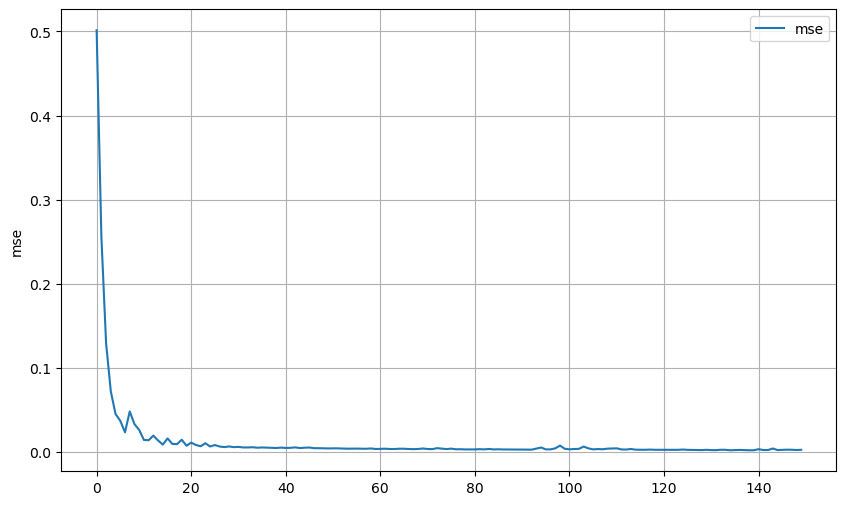

In [54]:
plt.figure(figsize=(10,6))

plt.plot(history.history['mse'])
# plt.plot(history.history['val_mse'])
plt.ylabel('mse')
# plt.legend(['mse', 'val_mse'])
plt.legend(['mse'])
plt.grid()

plt.show()

In [55]:
model.save('./learned_models/model_0520_132_ver1.h5')

In [56]:
pred = model.predict(X_train)

5/5 [==============================] - 0s 5ms/step


In [57]:
print(f'pred shape = {pred.shape}')
print(f'pred[0] shape = {pred[0].shape}')

pred shape = (132, 308)
pred[0] shape = (308,)


In [39]:
# sample1 = y_test[0]
# sample1 = sample1.reshape((14, 11, 2))
# sample1

In [40]:
# sample1 = pred[1]
# sample1 = sample1.reshape((14, 11, 2))
# sample1

### 결과 확인

In [97]:
num = 62

temp_pred = pred[num].reshape((14, 11, 2))
# temp_y_test = y_test[num].reshape((14, 11, 2))
temp_y_test = y_train[num].reshape((14, 11, 2))

print(f'temp_pred shape {temp_pred.shape}')
print(f'temp_y_test shape {temp_y_test.shape}')

temp_pred shape (14, 11, 2)
temp_y_test shape (14, 11, 2)


In [98]:
temp_pred[7]

array([[0.46607384, 0.4603532 ],
       [0.5872432 , 0.5057632 ],
       [0.3433246 , 0.5161502 ],
       [0.5473165 , 0.67620826],
       [0.40848312, 0.66504544],
       [0.6806193 , 0.68607324],
       [0.24799345, 0.6977219 ],
       [0.66310745, 0.80969375],
       [0.3065736 , 0.8277854 ],
       [0.7230618 , 0.8775286 ],
       [0.22492935, 0.86810446]], dtype=float32)

In [99]:
temp_y_test[7]

array([[0.47853, 0.4796 ],
       [0.59679, 0.53702],
       [0.36485, 0.5324 ],
       [0.54291, 0.66415],
       [0.40579, 0.66499],
       [0.68922, 0.71467],
       [0.25279, 0.71328],
       [0.70263, 0.85285],
       [0.27628, 0.84829],
       [0.74797, 0.89599],
       [0.22406, 0.89261]])

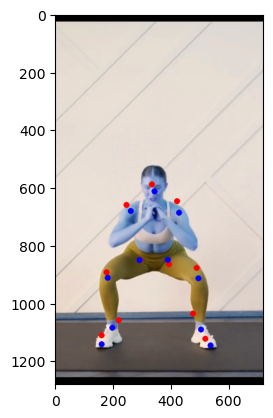

In [100]:
number = num

img = cv2.imread(f'./data/total_0513/2_images/062/exercise_08.jpg')
background = np.zeros(shape=img.shape, dtype=np.uint8) + 255

# pred 좌표
for i in temp_pred[7]:
    cx = int(i[0]*img.shape[1])
    cy = int(i[1]*img.shape[0])
    cv2.circle(img, (cx, cy), radius=5, color=(255,0,0), thickness=10)
    
# y_test 좌표
for i in temp_y_test[7]:
    cx = int(i[0]*img.shape[1])
    cy = int(i[1]*img.shape[0])
    cv2.circle(img, (cx, cy), radius=5, color=(0,0,255), thickness=10)

plt.imshow(img)
plt.show()

<br><br><br>

## 5. 오차 계산

In [58]:
import tensorflow as tf

# mse 계산

def mse_loss(y_true, y_pred):
    err = y_true - y_pred
    loss = tf.math.reduce_mean(tf.math.square(err))

    return loss

In [59]:
a = mse_loss(y_train[0], pred[0])
print(str(a)[10:30])

0.001005723043900004


In [110]:
a = mse_loss(y_test[0], pred[0])
print(str(a)[10:30])

0.001850691291256452


In [111]:
lst_loss = []

for i in range(len(pred)):
    loss = str(mse_loss(y_test[i], pred[i]))[10:30]
    lst_loss.append(loss)

    
best = min(lst_loss)
worst = max(lst_loss)
print(f'best reps : {lst_loss.index(best)}번째 영상')
print(f'worst reps : {lst_loss.index(worst)}번째 영상')
print()

lst_loss

best reps : 5번째 영상
worst reps : 4번째 영상



['0.001850691291256452',
 '0.000829306611644204',
 '0.000784214582935485',
 '0.001043664066219388',
 '0.002498048528720548',
 '0.000397315796537173',
 '0.000873404997367295',
 '0.001206607913398898',
 '0.000900766686440168',
 '0.001393749001200887']

In [229]:
a = ['a', 'b', 'c', 'd', 'e']

a.index('a')

0

<br><br>

### 중앙에서 스쿼트 하는 데이터셋으로 결과를 확인해보자

In [33]:
df_test1 = pd.read_csv('./data/csv/squat_test/squat_skeleton_test1.csv')
df_test1.set_index('Unnamed: 0', inplace=True)
df_test1

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0.52282,0.20917,0.63405,0.28787,0.41422,0.28931,0.60158,0.52224,0.43810,0.52067,...,0.38985,0.70141,0.67151,0.86796,0.37314,0.87897,0.77374,0.93052,0.30715,0.94436
1,0.52437,0.19834,0.64149,0.27693,0.40765,0.27656,0.60163,0.51825,0.43499,0.51819,...,0.38997,0.70295,0.67759,0.87011,0.37187,0.87964,0.77727,0.93008,0.30153,0.94267
2,0.51838,0.20569,0.62892,0.28898,0.40321,0.28287,0.58523,0.52376,0.42283,0.52309,...,0.36834,0.70104,0.66871,0.87101,0.36090,0.88454,0.78668,0.92759,0.28561,0.94499
3,0.52131,0.24280,0.63444,0.33241,0.40525,0.32880,0.58625,0.56113,0.41859,0.56266,...,0.32693,0.71950,0.68645,0.87558,0.35084,0.88793,0.79470,0.92411,0.28307,0.94281
4,0.52214,0.32690,0.63661,0.40665,0.40897,0.40702,0.58928,0.62119,0.42787,0.62006,...,0.28918,0.73512,0.69065,0.87924,0.35028,0.88285,0.79318,0.92452,0.27180,0.94137
5,0.51826,0.40935,0.63468,0.48309,0.40568,0.48085,0.59940,0.68288,0.43900,0.67961,...,0.26824,0.74758,0.69151,0.87772,0.35248,0.88548,0.78999,0.92423,0.27862,0.94192
6,0.52084,0.45466,0.63403,0.52722,0.40751,0.52649,0.60720,0.71865,0.44874,0.71855,...,0.25720,0.75411,0.69026,0.87981,0.35526,0.88694,0.78693,0.92532,0.27420,0.93757
7,0.52626,0.46401,0.64044,0.54006,0.40519,0.53953,0.60978,0.73478,0.45267,0.73510,...,0.26514,0.75249,0.68363,0.88034,0.36222,0.88814,0.78292,0.92242,0.28483,0.93967
8,0.52304,0.46044,0.63813,0.54033,0.40838,0.53646,0.60478,0.73242,0.45076,0.73262,...,0.26285,0.75072,0.68161,0.87913,0.36122,0.88696,0.78442,0.92240,0.28092,0.93621


In [34]:
test1_input = df_test1.iloc[0]
test1_output = df_test1.iloc[1:]
print(test1_input.shape, test1_output.shape)

test1_input = np.array(test1_input)
test1_output = np.array(test1_output)
print(test1_input.shape, test1_output.shape)

test1_input = test1_input.reshape(1, 22)
test1_output = test1_output.flatten()
test1_output = test1_output.reshape(1, 308)
print(test1_input.shape, test1_output.shape)

(22,) (14, 22)
(22,) (14, 22)
(1, 22) (1, 308)


In [35]:
test1_input

array([[0.52282, 0.20917, 0.63405, 0.28787, 0.41422, 0.28931, 0.60158,
        0.52224, 0.4381 , 0.52067, 0.6515 , 0.70376, 0.38985, 0.70141,
        0.67151, 0.86796, 0.37314, 0.87897, 0.77374, 0.93052, 0.30715,
        0.94436]])

In [36]:
test1_output

array([[0.52437, 0.19834, 0.64149, 0.27693, 0.40765, 0.27656, 0.60163,
        0.51825, 0.43499, 0.51819, 0.64798, 0.69877, 0.38997, 0.70295,
        0.67759, 0.87011, 0.37187, 0.87964, 0.77727, 0.93008, 0.30153,
        0.94267, 0.51838, 0.20569, 0.62892, 0.28898, 0.40321, 0.28287,
        0.58523, 0.52376, 0.42283, 0.52309, 0.6648 , 0.69343, 0.36834,
        0.70104, 0.66871, 0.87101, 0.3609 , 0.88454, 0.78668, 0.92759,
        0.28561, 0.94499, 0.52131, 0.2428 , 0.63444, 0.33241, 0.40525,
        0.3288 , 0.58625, 0.56113, 0.41859, 0.56266, 0.72442, 0.70689,
        0.32693, 0.7195 , 0.68645, 0.87558, 0.35084, 0.88793, 0.7947 ,
        0.92411, 0.28307, 0.94281, 0.52214, 0.3269 , 0.63661, 0.40665,
        0.40897, 0.40702, 0.58928, 0.62119, 0.42787, 0.62006, 0.74923,
        0.73075, 0.28918, 0.73512, 0.69065, 0.87924, 0.35028, 0.88285,
        0.79318, 0.92452, 0.2718 , 0.94137, 0.51826, 0.40935, 0.63468,
        0.48309, 0.40568, 0.48085, 0.5994 , 0.68288, 0.439  , 0.67961,
      

In [37]:
pred1 = model.predict(test1_input)

1/1 [==============================] - 0s 241ms/step


In [38]:
pred1

array([[0.4484428 , 0.16664468, 0.56854874, 0.2692584 , 0.3454321 ,
        0.25545526, 0.5070131 , 0.4730652 , 0.4035508 , 0.47238198,
        0.57287693, 0.6238234 , 0.34168753, 0.59406453, 0.58382326,
        0.7639029 , 0.3733277 , 0.7638314 , 0.6364072 , 0.81741685,
        0.27294058, 0.8122588 , 0.461938  , 0.16397053, 0.54450583,
        0.2565134 , 0.34032568, 0.25435844, 0.50721   , 0.47487664,
        0.40786815, 0.48701778, 0.5847739 , 0.62900394, 0.3154936 ,
        0.6132657 , 0.58128566, 0.7663678 , 0.3126951 , 0.7801365 ,
        0.64152807, 0.8230682 , 0.27206513, 0.8156831 , 0.43742996,
        0.2216966 , 0.5344605 , 0.26883167, 0.33690313, 0.2968204 ,
        0.50014234, 0.5027688 , 0.40439972, 0.47463816, 0.6027646 ,
        0.61797845, 0.2974533 , 0.64328945, 0.5826706 , 0.8035595 ,
        0.34052032, 0.78263056, 0.634889  , 0.8122126 , 0.25658384,
        0.7967107 , 0.42856634, 0.25483674, 0.55547017, 0.33607796,
        0.37234372, 0.34181064, 0.47719756, 0.52

In [39]:
test_pred = pred1.reshape((14, 11, 2))
test_pred

array([[[0.4484428 , 0.16664468],
        [0.56854874, 0.2692584 ],
        [0.3454321 , 0.25545526],
        [0.5070131 , 0.4730652 ],
        [0.4035508 , 0.47238198],
        [0.57287693, 0.6238234 ],
        [0.34168753, 0.59406453],
        [0.58382326, 0.7639029 ],
        [0.3733277 , 0.7638314 ],
        [0.6364072 , 0.81741685],
        [0.27294058, 0.8122588 ]],

       [[0.461938  , 0.16397053],
        [0.54450583, 0.2565134 ],
        [0.34032568, 0.25435844],
        [0.50721   , 0.47487664],
        [0.40786815, 0.48701778],
        [0.5847739 , 0.62900394],
        [0.3154936 , 0.6132657 ],
        [0.58128566, 0.7663678 ],
        [0.3126951 , 0.7801365 ],
        [0.64152807, 0.8230682 ],
        [0.27206513, 0.8156831 ]],

       [[0.43742996, 0.2216966 ],
        [0.5344605 , 0.26883167],
        [0.33690313, 0.2968204 ],
        [0.50014234, 0.5027688 ],
        [0.40439972, 0.47463816],
        [0.6027646 , 0.61797845],
        [0.2974533 , 0.64328945],
        [0

In [40]:
test1_output_ = test1_output.reshape((14, 11, 2))
test1_output_

array([[[0.52437, 0.19834],
        [0.64149, 0.27693],
        [0.40765, 0.27656],
        [0.60163, 0.51825],
        [0.43499, 0.51819],
        [0.64798, 0.69877],
        [0.38997, 0.70295],
        [0.67759, 0.87011],
        [0.37187, 0.87964],
        [0.77727, 0.93008],
        [0.30153, 0.94267]],

       [[0.51838, 0.20569],
        [0.62892, 0.28898],
        [0.40321, 0.28287],
        [0.58523, 0.52376],
        [0.42283, 0.52309],
        [0.6648 , 0.69343],
        [0.36834, 0.70104],
        [0.66871, 0.87101],
        [0.3609 , 0.88454],
        [0.78668, 0.92759],
        [0.28561, 0.94499]],

       [[0.52131, 0.2428 ],
        [0.63444, 0.33241],
        [0.40525, 0.3288 ],
        [0.58625, 0.56113],
        [0.41859, 0.56266],
        [0.72442, 0.70689],
        [0.32693, 0.7195 ],
        [0.68645, 0.87558],
        [0.35084, 0.88793],
        [0.7947 , 0.92411],
        [0.28307, 0.94281]],

       [[0.52214, 0.3269 ],
        [0.63661, 0.40665],
        [0.408

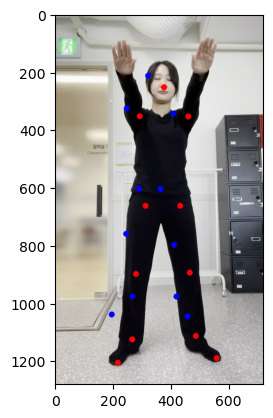

In [41]:
img = cv2.imread('./data/images/sample2/exercise_01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
background = np.zeros(shape=img.shape, dtype=np.uint8) + 255

for i in test1_output_[0]:
    cx = int(i[0]*img.shape[1])
    cy = int(i[1]*img.shape[0])
    cv2.circle(img, (cx, cy), radius=5, color=(255,0,0), thickness=10)
    
for i in test_pred[0]:
    cx = int(i[0]*img.shape[1])
    cy = int(i[1]*img.shape[0])
    cv2.circle(img, (cx, cy), radius=5, color=(0,0,255), thickness=10)

plt.imshow(img)

<br><br>

## 학습 데이터 가지고 확인해보기

#### 이미지 레이블까지 해서 제대로 데이터셋 다시 정리해야 할듯..

In [157]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_dtype=True, show_layer_activations=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
